In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("ecommerce_recommendation_dataset.csv")
df.head()

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,...,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity
0,78517,1645,Books,842.23,2,155,24,Other,Urban,False,...,0.13,-0.28,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54
1,52887,100,Books,253.76,3,331,43,Other,Suburban,False,...,0.02,0.28,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77
2,59395,585,Books,483.65,2,236,64,Female,Rural,True,...,1.55,0.23,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14
3,54739,3774,Groceries,459.37,2,227,34,Female,Urban,False,...,1.41,0.93,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18
4,42723,2119,Groceries,150.11,2,214,51,Female,Urban,True,...,1.29,0.11,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66


In [3]:
df.shape

(60000, 51)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  60000 non-null  int64  
 1   product_id               60000 non-null  int64  
 2   category                 60000 non-null  object 
 3   price                    60000 non-null  float64
 4   rating                   60000 non-null  int64  
 5   review_count             60000 non-null  int64  
 6   user_age                 60000 non-null  int64  
 7   user_gender              60000 non-null  object 
 8   user_location            60000 non-null  object 
 9   purchase_history         60000 non-null  bool   
 10  time_on_page             60000 non-null  float64
 11  add_to_cart_count        60000 non-null  int64  
 12  search_keywords          60000 non-null  object 
 13  discount_applied         60000 non-null  bool   
 14  user_membership       

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

0

In [7]:
obj, num = 0,0
for cols in df.columns:
    if df[cols].dtype == 'O':
        obj += 1
    else:
        num += 1
    
print(f"The dataset has {obj} categorical columns and {num} numerical columns")

The dataset has 20 categorical columns and 31 numerical columns


In [8]:
df.describe()

,user_id,product_id,price,rating,review_count,user_age,time_on_page,add_to_cart_count,session_duration,clicks_on_ads,...,time_to_purchase,delivery_time,shipping_fee,seller_rating,seller_response_time,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,product_popularity
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,50109.404617,2491.198100,502.938655,2.996383,250.173567,43.425617,15.221682,4.498617,1797.510736,9.506933,...,150.047750,7.996907,25.010656,3.001217,36.544411,0.996772,-0.000710,0.499817,0.500185,0.501787
std,28913.382290,1441.522417,288.082193,1.415970,144.807302,14.995046,8.485544,2.863739,1037.231985,5.771029,...,86.313955,4.039380,14.451148,1.412710,20.527944,0.576923,0.579466,0.289040,0.289875,0.288986
min,1.000000,1.000000,5.010000,1.000000,0.000000,18.000000,0.500000,0.000000,1.030000,0.000000,...,1.010000,1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,25022.500000,1245.000000,252.802500,2.000000,124.000000,30.000000,7.910000,2.000000,901.792500,5.000000,...,74.967500,4.510000,12.470000,2.000000,18.850000,0.500000,-0.500000,0.250000,0.250000,0.250000
50%,50208.500000,2481.500000,504.355000,3.000000,251.000000,43.000000,15.170000,5.000000,1798.315000,10.000000,...,149.980000,7.990000,25.070000,3.000000,36.520000,0.990000,0.000000,0.500000,0.500000,0.500000
75%,75141.500000,3731.000000,752.592500,4.000000,375.000000,56.000000,22.562500,7.000000,2692.330000,15.000000,...,224.680000,11.490000,37.530000,4.000000,54.380000,1.500000,0.500000,0.750000,0.750000,0.750000
max,99997.000000,4999.000000,999.990000,5.000000,499.000000,69.000000,30.000000,9.000000,3599.970000,19.000000,...,300.000000,15.000000,50.000000,5.000000,72.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
x = df.drop(['purchase_history', 'user_id', 'product_id','product_size','product_color','review_sentiment_score','purchase_time','seller_location','seller_response_time','search_keywords', 'referral_source'], axis=1)
x.head()

,category,price,rating,review_count,user_age,user_gender,user_location,time_on_page,add_to_cart_count,discount_applied,...,seller_rating,product_rating_variance,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity
0,Books,842.23,2,155,24,Other,Urban,13.86,6,False,...,2,0.13,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54
1,Books,253.76,3,331,43,Other,Suburban,13.03,3,True,...,3,0.02,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77
2,Books,483.65,2,236,64,Female,Rural,3.75,7,False,...,3,1.55,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14
3,Groceries,459.37,2,227,34,Female,Urban,6.01,0,True,...,1,1.41,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18
4,Groceries,150.11,2,214,51,Female,Urban,6.89,9,False,...,5,1.29,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66


In [10]:
y=df['purchase_history']
y.head()

0    False
1    False
2     True
3    False
4     True
Name: purchase_history, dtype: bool

In [11]:
x.columns

Index(['category', 'price', 'rating', 'review_count', 'user_age',
       'user_gender', 'user_location', 'time_on_page', 'add_to_cart_count',
       'discount_applied', 'user_membership', 'user_browser', 'user_device',
       'session_duration', 'clicks_on_ads', 'page_views', 'wishlist_additions',
       'cart_abandonment_rate', 'average_spent', 'user_income',
       'user_education', 'user_marital_status', 'product_availability',
       'stock_status', 'product_return_rate', 'is_top_seller',
       'discount_percentage', 'time_to_purchase', 'delivery_time',
       'shipping_fee', 'seller_rating', 'product_rating_variance',
       'user_engagement_score', 'ad_click_rate', 'time_of_day', 'day_of_week',
       'season', 'payment_method', 'coupon_used', 'product_popularity'],
      dtype='object')

# Creating new features

User information: age, gender, location, income, engagement score, etc

Product details: price, category, popularity, availability, return rate, etc

User-Product interaction: time on page, clicks, cart additions, sentiment, and ratings.


In [12]:
def age_group(user_age):
    if user_age < 30:
        return 'Under 30'
    elif user_age >30 and user_age <= 50:
        return '30-49'
    else:
        return '50+'

df['age_group'] = df['user_age'].apply(age_group)

In [13]:
df['weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

In [14]:
df['weekday'] = df['day_of_week'].isin(['Monday', 'Tuesday','Wednesday','Thursday','Friday']).astype(int)

In [15]:
df['weekend_purchases'] = ((df['weekend'] == 1) & (df['purchase_history'] == 1)).astype(int)
x['weekend_purchases'] = df['weekend_purchases']

In [16]:
df['weekday_purchases'] = ((df['weekday'] == 1) & (df['purchase_history'] == 1)).astype(int)
x['weekday_purchases'] = df['weekday_purchases']

In [17]:
df['spending_per_min'] = df['average_spent']/df['session_duration']
df['spending_per_min'].head()

0    0.690155
1    3.146565
2    0.149732
3    4.084240
4    1.485493
Name: spending_per_min, dtype: float64

In [18]:
df['discount_impact'] = df['price'] * (df['discount_percentage'] / 100)
df['discount_impact'].head()

0     91.045063
1     77.346048
2    158.540470
3     40.975804
4     53.994567
Name: discount_impact, dtype: float64

In [19]:
x['spending_per_min']=df['spending_per_min']

In [20]:
x['discount_impact']=df['discount_impact']

In [21]:
df["total_interactions"] = df["page_views"] + df["add_to_cart_count"] + df["wishlist_additions"] + df["clicks_on_ads"]

In [22]:
x["total_interactions"] = df["total_interactions"] 

In [23]:
def gender_age(user_gender, user_age):
    if user_gender == 'female' and user_age < 30:
        return 'female_Under30'
    elif user_gender == 'female' and 30 <= user_age < 50:
        return 'female_over30_under50'
    elif user_gender == 'female' and user_age >= 50:
        return 'female_over50'
    elif user_gender == 'male' and user_age < 30:
        return 'male_Under30'
    elif user_gender == 'male' and 30 <= user_age < 50:
        return 'male_over30_under50'
    else:
        return 'male_over50'

df['age_group_gender'] = df.apply(lambda row: gender_age(row['user_gender'], row['user_age']), axis=1)

# Data Preprocessing

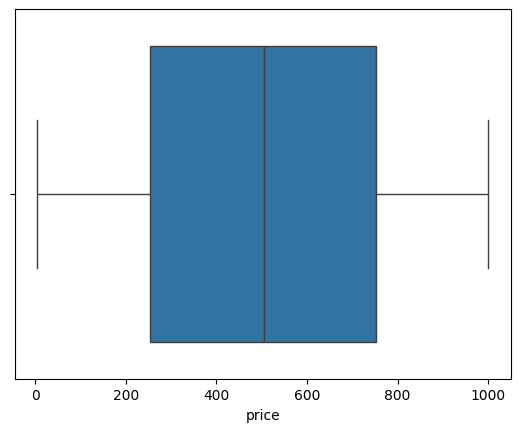

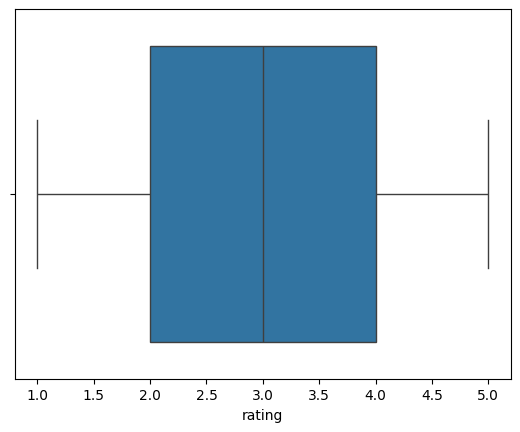

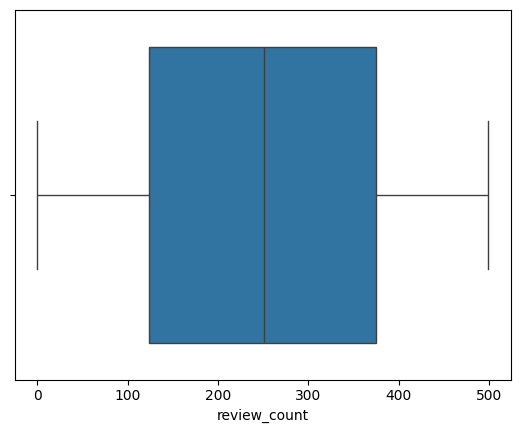

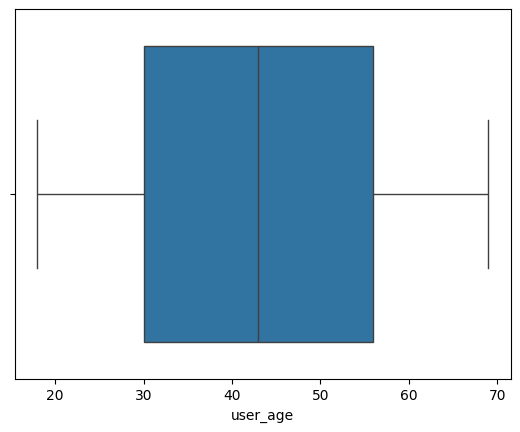

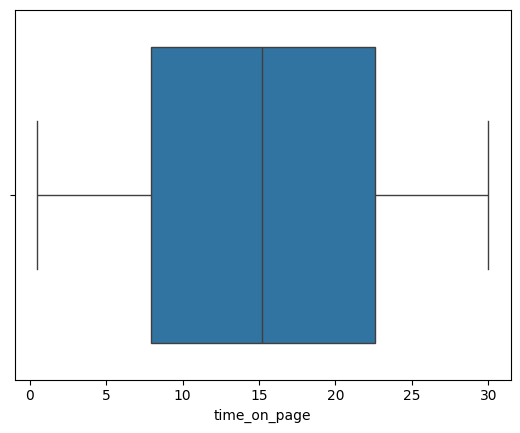

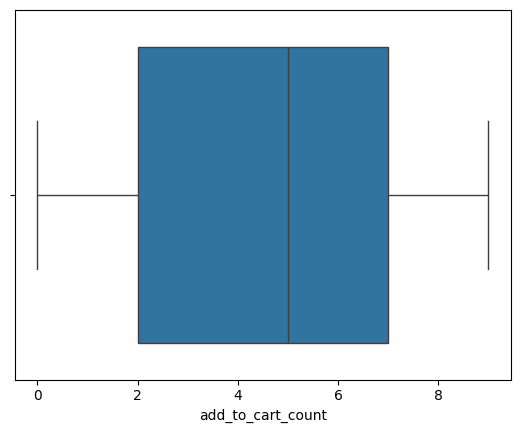

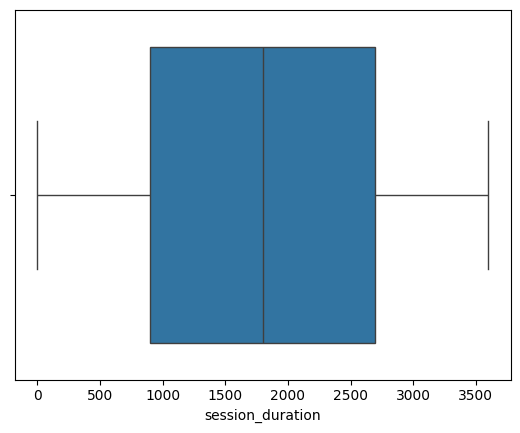

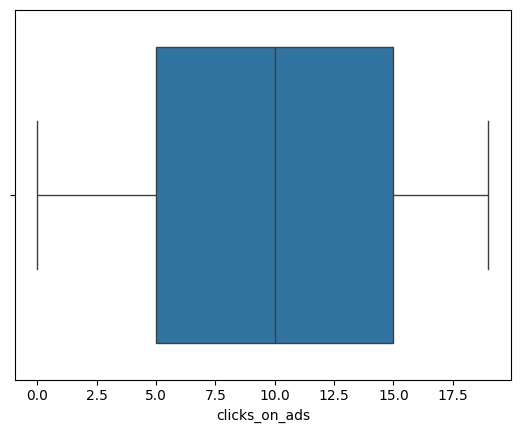

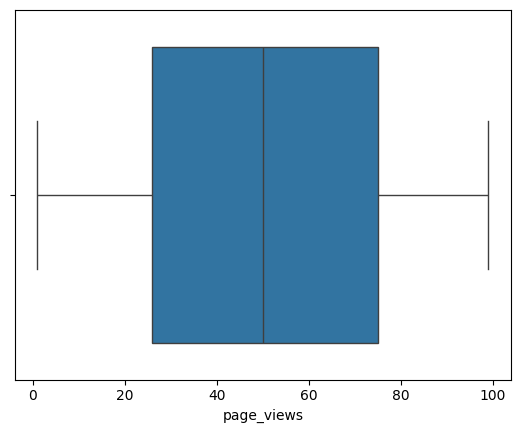

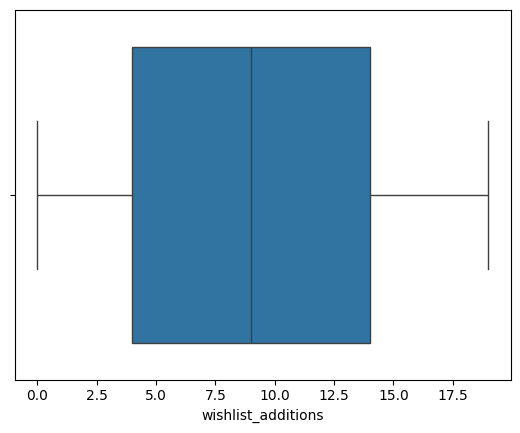

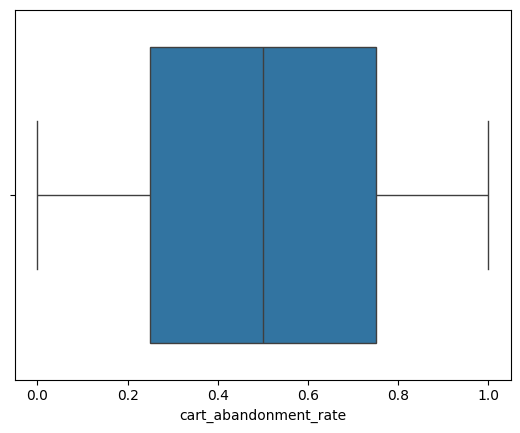

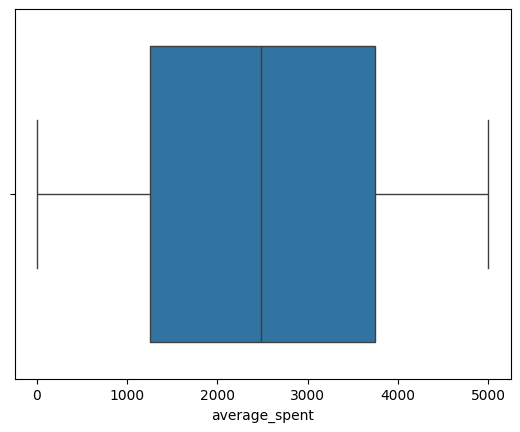

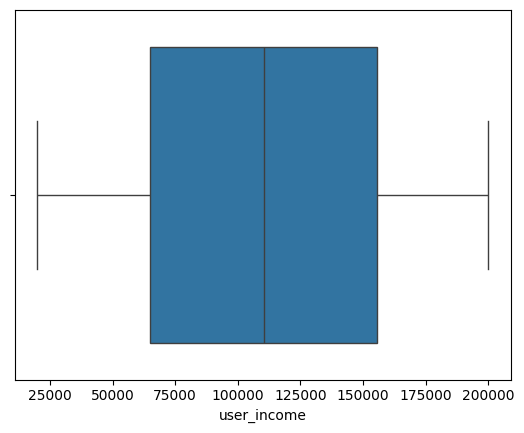

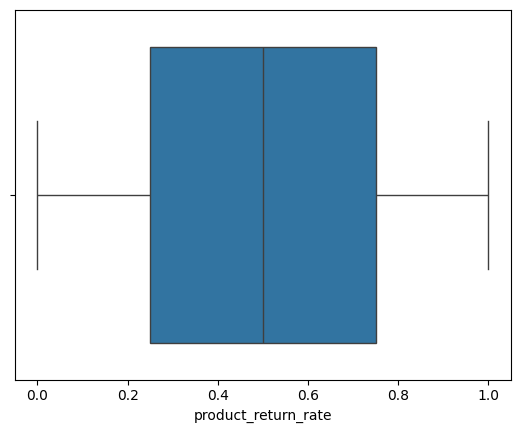

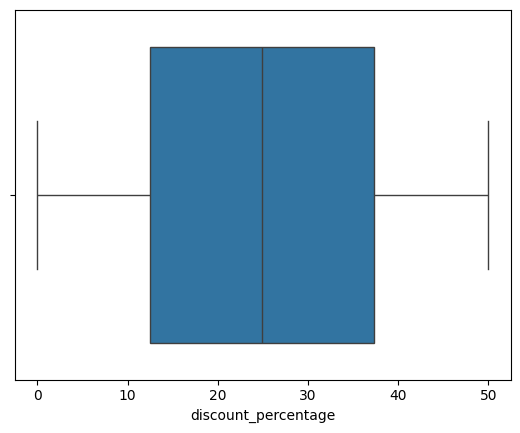

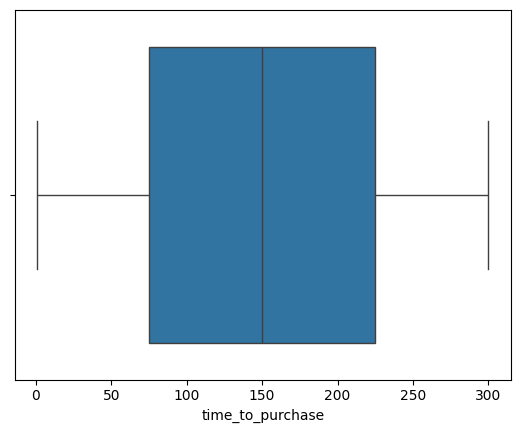

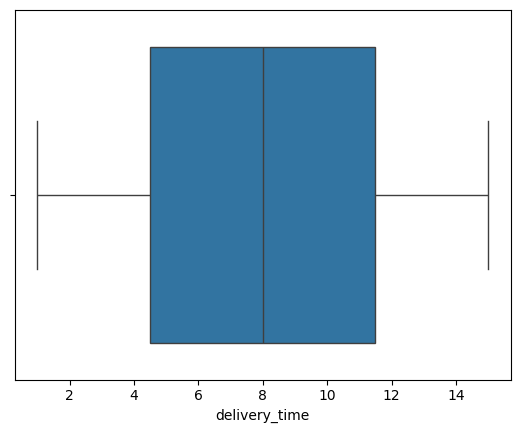

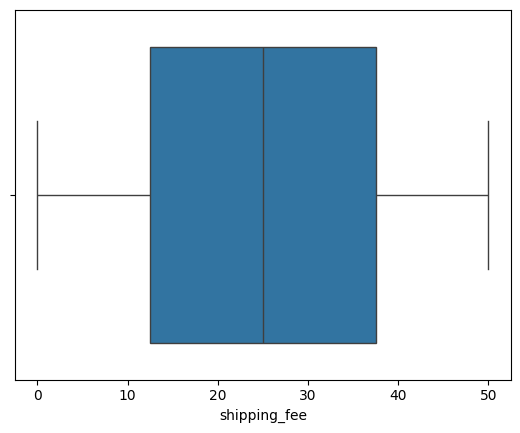

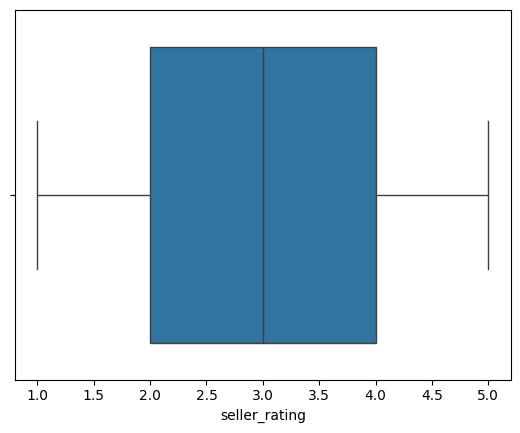

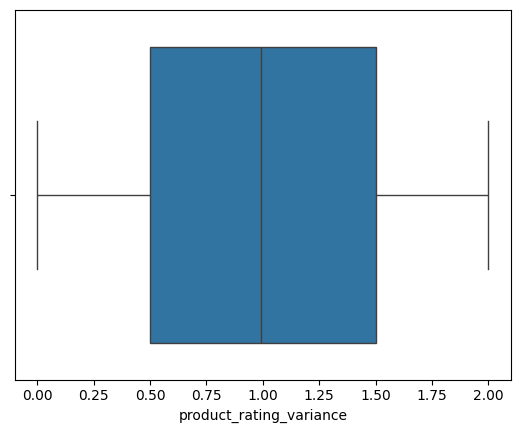

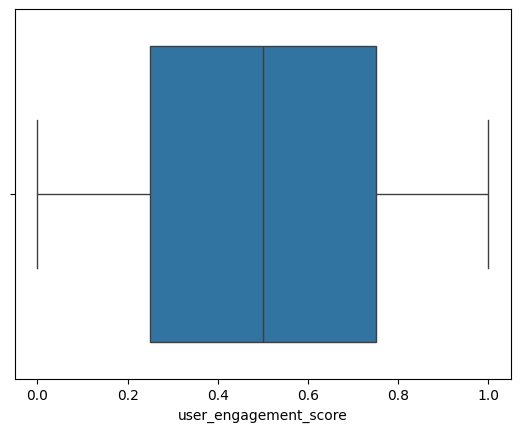

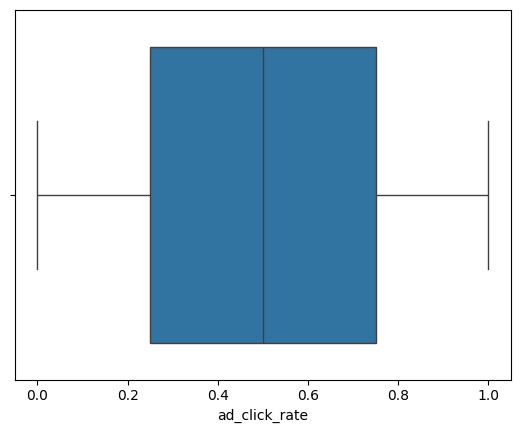

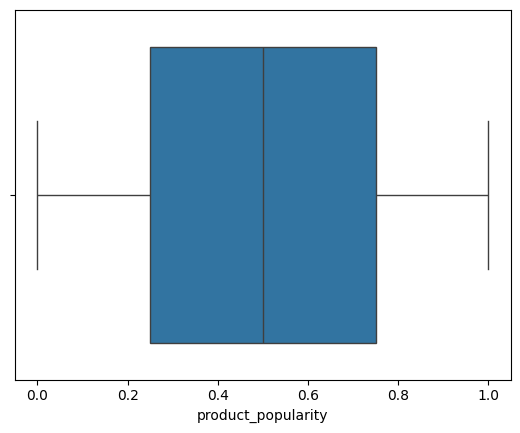

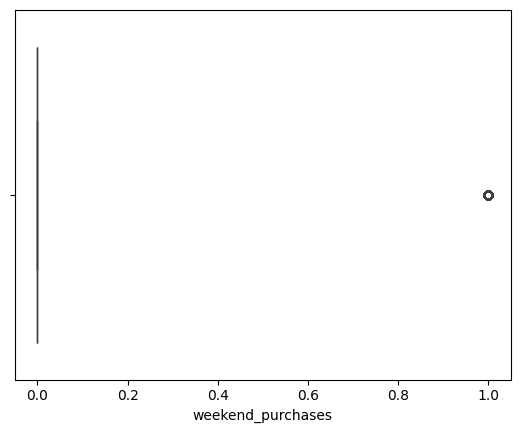

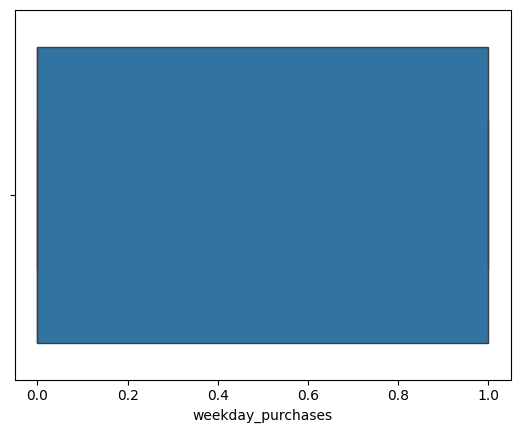

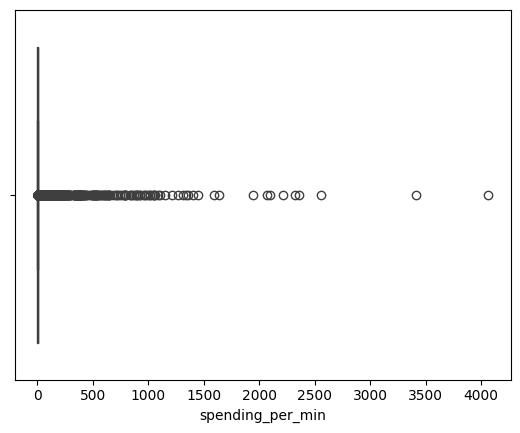

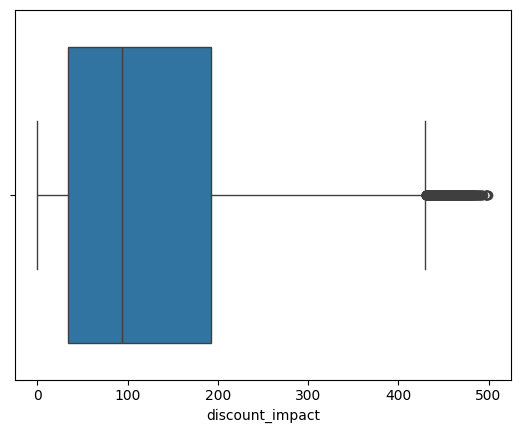

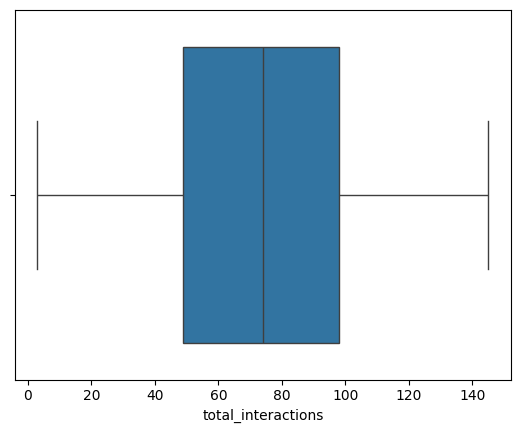

In [24]:
for cols in x.columns:
    if df[cols].dtype != 'O' and df[cols].dtypes != 'bool':
        sns.boxplot(df[cols], orient = 'h')
        plt.show()

In [25]:
#Two columns need treatment discount_impact, spending_per_min

In [26]:
Q1 = x['discount_impact'].quantile(0.25)
Q3 = x['discount_impact'].quantile(0.75)
IQR = Q3 - Q1

l_b = Q1 -1.5*IQR
u_b = Q3 +1.5*IQR

In [27]:
x['discount_impact'] = np.where(x['discount_impact'] < l_b, l_b, x['discount_impact'])
x['discount_impact'] = np.where(x['discount_impact'] > u_b, u_b, x['discount_impact'])

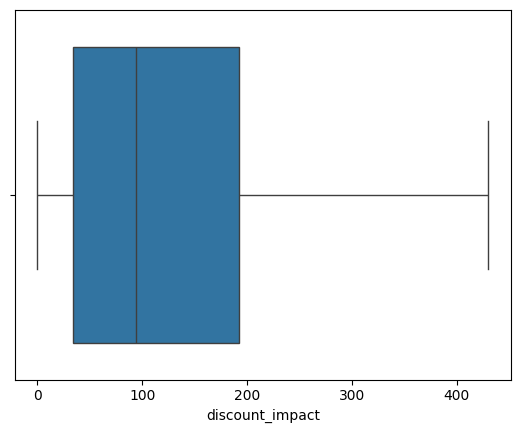

In [28]:
sns.boxplot(x['discount_impact'], orient='h')
plt.show()

In [29]:
x['spending_per_min'].skew()

38.36425861274078

In [30]:
Q1 = x['spending_per_min'].quantile(0.25)
Q3 = x['spending_per_min'].quantile(0.75)
IQR = Q3 - Q1

lb = Q1 -1.5*IQR
ub = Q3 +1.5*IQR

In [31]:
x['spending_per_min'] = np.where(x['spending_per_min'] < lb, lb, x['spending_per_min'])
x['spending_per_min'] = np.where(x['spending_per_min'] > ub, ub, x['spending_per_min'])

In [32]:
x['spending_per_min'].skew()

1.088440311804314

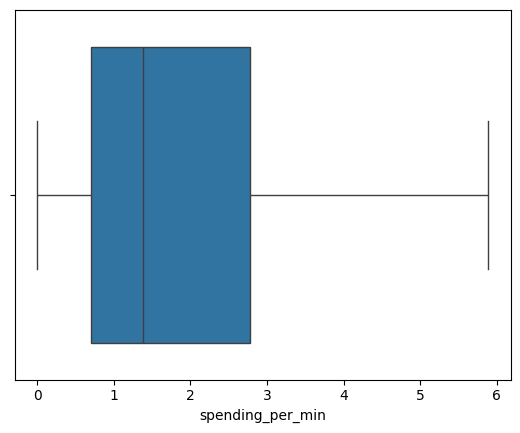

In [33]:
sns.boxplot(x['spending_per_min'], orient = 'h')
plt.show()

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 60000 non-null  object 
 1   price                    60000 non-null  float64
 2   rating                   60000 non-null  int64  
 3   review_count             60000 non-null  int64  
 4   user_age                 60000 non-null  int64  
 5   user_gender              60000 non-null  object 
 6   user_location            60000 non-null  object 
 7   time_on_page             60000 non-null  float64
 8   add_to_cart_count        60000 non-null  int64  
 9   discount_applied         60000 non-null  bool   
 10  user_membership          60000 non-null  object 
 11  user_browser             60000 non-null  object 
 12  user_device              60000 non-null  object 
 13  session_duration         60000 non-null  float64
 14  clicks_on_ads         

In [35]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 60000 non-null  object 
 1   price                    60000 non-null  float64
 2   rating                   60000 non-null  int64  
 3   review_count             60000 non-null  int64  
 4   user_age                 60000 non-null  int64  
 5   user_gender              60000 non-null  object 
 6   user_location            60000 non-null  object 
 7   time_on_page             60000 non-null  float64
 8   add_to_cart_count        60000 non-null  int64  
 9   discount_applied         60000 non-null  bool   
 10  user_membership          60000 non-null  object 
 11  user_browser             60000 non-null  object 
 12  user_device              60000 non-null  object 
 13  session_duration         60000 non-null  float64
 14  clicks_on_ads         

# Encoding

In [ ]:
#Using label encoding and one-hot as only one-hot encoding for all the categorical columns 
#created so many columns make futher analysis difficult

In [36]:
x['discount_applied']= x['discount_applied'].astype(int)
x['is_top_seller']= x['is_top_seller'].astype(int)
x['coupon_used']= x['coupon_used'].astype(int)


In [37]:
# label encoding ratings

x['rating'] = x['rating'].astype('category')
x['rating'] = x['rating'].cat.codes

In [38]:
x['seller_rating'] = x['seller_rating'].astype('category')
x['seller_rating'] = x['seller_rating'].cat.codes

In [39]:
x['time_of_day'] = x['time_of_day'].astype('category')
x['time_of_day'] = x['time_of_day'].cat.codes

In [40]:
x['season'] = x['season'].astype('category')
x['season'] = x['season'].cat.codes

In [41]:
x['user_membership'] = x['user_membership'].astype('category')
x['user_membership'] = x['user_membership'].cat.codes

In [42]:
x['user_gender']=x['user_gender'].astype('category')
x['user_gender']=x['user_gender'].cat.codes

In [43]:
x['age_group']= df['age_group'] 

In [44]:
x['age_group']=x['age_group'].astype('category')
x['age_group']=x['age_group'].cat.codes

In [45]:
x['user_education']=df['user_education']

In [46]:
x['user_education']=x['user_education'].astype('category')
x['user_education']=x['user_education'].cat.codes

In [47]:
x['age_group']=x['age_group'].astype('category')
x['age_group']=x['age_group'].cat.codes

In [48]:
y=y.astype('category')
y=y.cat.codes

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [50]:
categorical_columns = x.select_dtypes(include = ['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(x[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([x, one_hot_df], axis=1)
x_encoded = df_encoded.drop(categorical_columns, axis=1)

In [51]:
x_encoded.shape

(60000, 73)

In [52]:
x_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              60000 non-null  float64
 1   rating                             60000 non-null  int8   
 2   review_count                       60000 non-null  int64  
 3   user_age                           60000 non-null  int64  
 4   user_gender                        60000 non-null  int8   
 5   time_on_page                       60000 non-null  float64
 6   add_to_cart_count                  60000 non-null  int64  
 7   discount_applied                   60000 non-null  int32  
 8   user_membership                    60000 non-null  int8   
 9   session_duration                   60000 non-null  float64
 10  clicks_on_ads                      60000 non-null  int64  
 11  page_views                         60000 non-null  int

In [53]:
x_encoded.describe()

,price,rating,review_count,user_age,user_gender,time_on_page,add_to_cart_count,discount_applied,user_membership,session_duration,...,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,payment_method_PayPal
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,502.938655,1.996383,250.173567,43.425617,1.005683,15.221682,4.498617,0.500867,1.501267,1797.510736,...,0.145350,0.142867,0.143600,0.142350,0.142050,0.141950,0.251517,0.250367,0.251300,0.246817
std,288.082193,1.415970,144.807302,14.995046,0.818431,8.485544,2.863739,0.500003,1.117536,1037.231985,...,0.352456,0.349940,0.350687,0.349412,0.349104,0.349002,0.433888,0.433228,0.433764,0.431163
min,5.010000,0.000000,0.000000,18.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.030000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,252.802500,1.000000,124.000000,30.000000,0.000000,7.910000,2.000000,0.000000,1.000000,901.792500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,504.355000,2.000000,251.000000,43.000000,1.000000,15.170000,5.000000,1.000000,2.000000,1798.315000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,752.592500,3.000000,375.000000,56.000000,2.000000,22.562500,7.000000,1.000000,2.000000,2692.330000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,999.990000,4.000000,499.000000,69.000000,2.000000,30.000000,9.000000,1.000000,3.000000,3599.970000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
numerical_cols = x_encoded.select_dtypes(include=['int64', 'float64']).columns
x_numerical = x_encoded[numerical_cols]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_numerical)

x_scaler = pd.DataFrame(x_scaled, columns=numerical_cols, index=x.index)

In [55]:
x_scaler.describe()

,price,review_count,user_age,time_on_page,add_to_cart_count,session_duration,clicks_on_ads,page_views,wishlist_additions,cart_abandonment_rate,...,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,payment_method_PayPal
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,-1.364834e-16,5.435652e-17,-2.318738e-16,1.048051e-17,-8.905469e-17,-2.263079e-16,1.393848e-16,4.950114e-17,4.026409e-18,-1.481482e-16,...,-3.363236e-17,-4.384641e-17,-8.822572e-17,9.319952e-17,-9.000208e-17,8.277823e-17,-4.689582e-17,1.243450e-17,-2.652693e-17,-2.842171e-18
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.728440e+00,-1.727645e+00,-1.695615e+00,-1.734928e+00,-1.570902e+00,-1.732010e+00,-1.647369e+00,-1.723486e+00,-1.643319e+00,-1.729190e+00,...,-4.123950e-01,-4.082642e-01,-4.094858e-01,-4.074025e-01,-4.069018e-01,-4.067349e-01,-5.796853e-01,-5.779148e-01,-5.793518e-01,-5.724491e-01
25%,-8.682878e-01,-8.713277e-01,-8.953443e-01,-8.616705e-01,-8.725088e-01,-8.635732e-01,-7.809649e-01,-8.460455e-01,-9.506537e-01,-8.653327e-01,...,-4.123950e-01,-4.082642e-01,-4.094858e-01,-4.074025e-01,-4.069018e-01,-4.067349e-01,-5.796853e-01,-5.779148e-01,-5.793518e-01,-5.724491e-01
50%,4.916502e-03,5.707172e-03,-2.838405e-02,-6.090625e-03,1.750814e-01,7.754008e-04,8.543897e-02,-3.702216e-03,-8.482259e-02,-1.474893e-03,...,-4.123950e-01,-4.082642e-01,-4.094858e-01,-4.074025e-01,-4.069018e-01,-4.067349e-01,-5.796853e-01,-5.779148e-01,-5.793518e-01,-5.724491e-01
75%,8.666135e-01,8.620247e-01,8.385761e-01,8.651042e-01,8.734749e-01,8.627064e-01,9.518428e-01,8.737387e-01,7.810085e-01,8.623829e-01,...,-4.123950e-01,-4.082642e-01,-4.094858e-01,-4.074025e-01,-4.069018e-01,-4.067349e-01,1.725074e+00,1.730359e+00,1.726067e+00,-5.724491e-01
max,1.725395e+00,1.718342e+00,1.705536e+00,1.741602e+00,1.571868e+00,1.737774e+00,1.644966e+00,1.716082e+00,1.646840e+00,1.726241e+00,...,2.424860e+00,2.449394e+00,2.442087e+00,2.454575e+00,2.457595e+00,2.458604e+00,1.725074e+00,1.730359e+00,1.726067e+00,1.746880e+00


# Exploratory Data Analysis

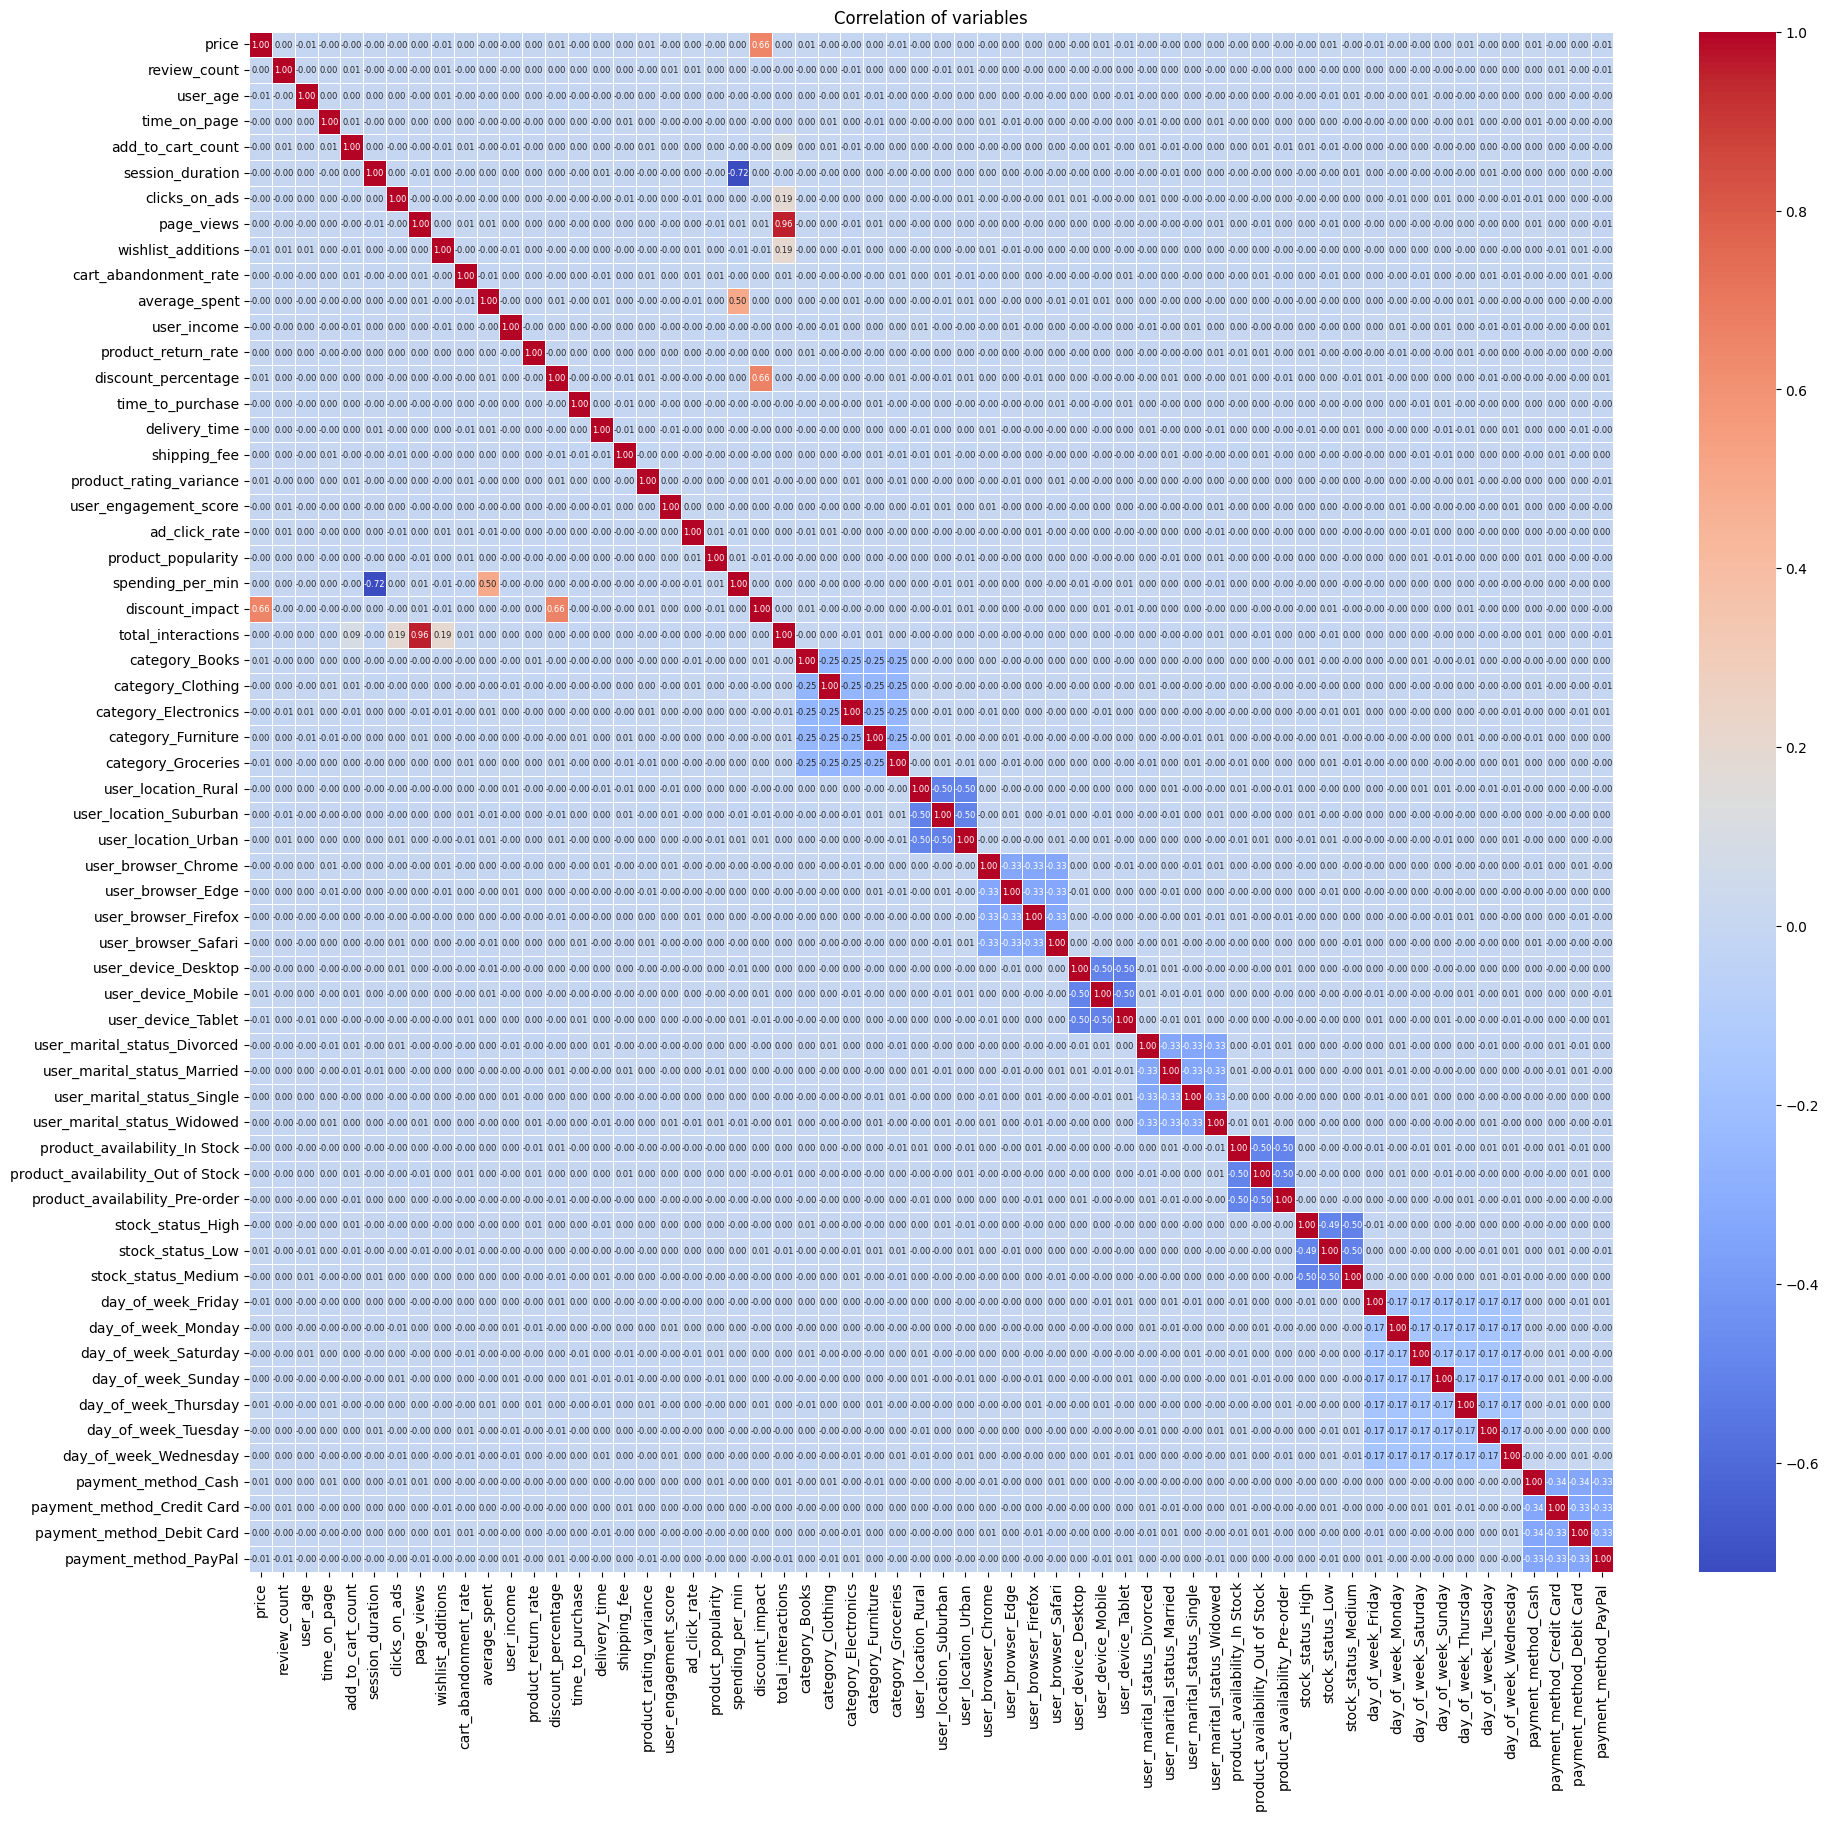

In [56]:
plt.figure(figsize=(22, 20))
sns.heatmap(x_scaler.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws ={"size": 6})
plt.title('Correlation of variables')
plt.show() 

In [57]:
x_scaler= x_scaler.drop(['price'], axis=1)

In [58]:
x_scaler= x_scaler.drop(['total_interactions'], axis=1)

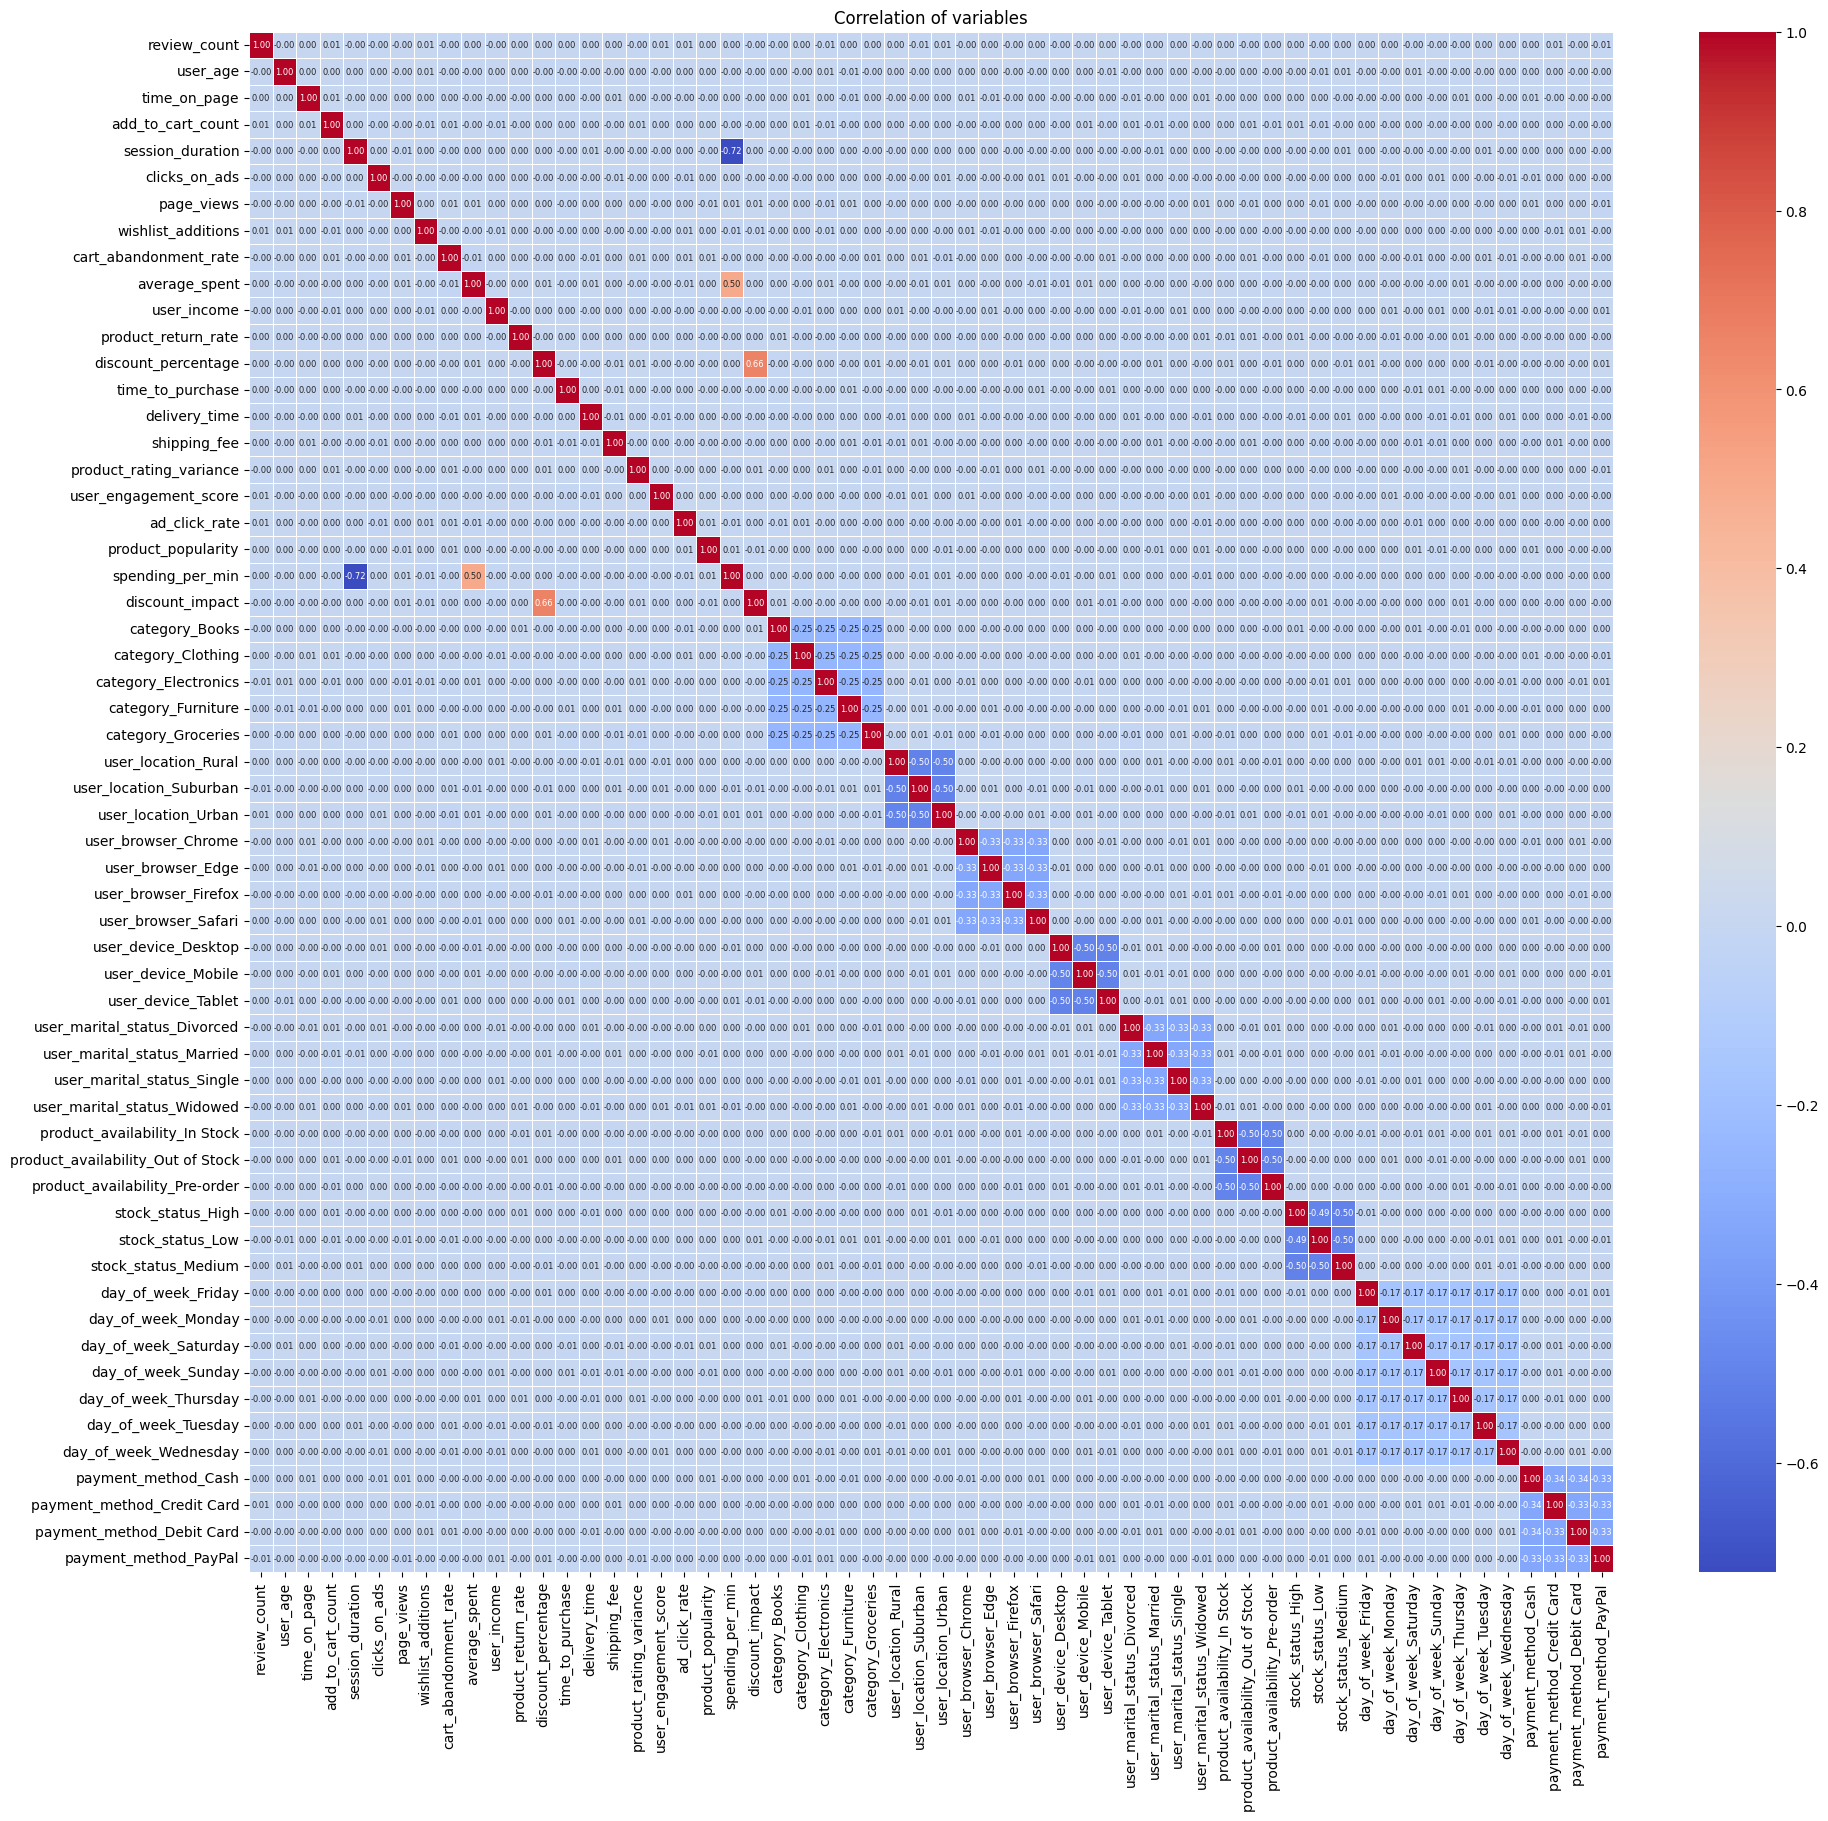

In [59]:
plt.figure(figsize=(22, 20))
sns.heatmap(x_scaler.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws ={"size": 6})
plt.title('Correlation of variables')
plt.show() 

## Average spent on category based on location

Text(0.5, 0.5, 'OBSERVATION\n_______________________\n\nNo significant difference spotted in the\n average spent between the population\n residing in different locations')

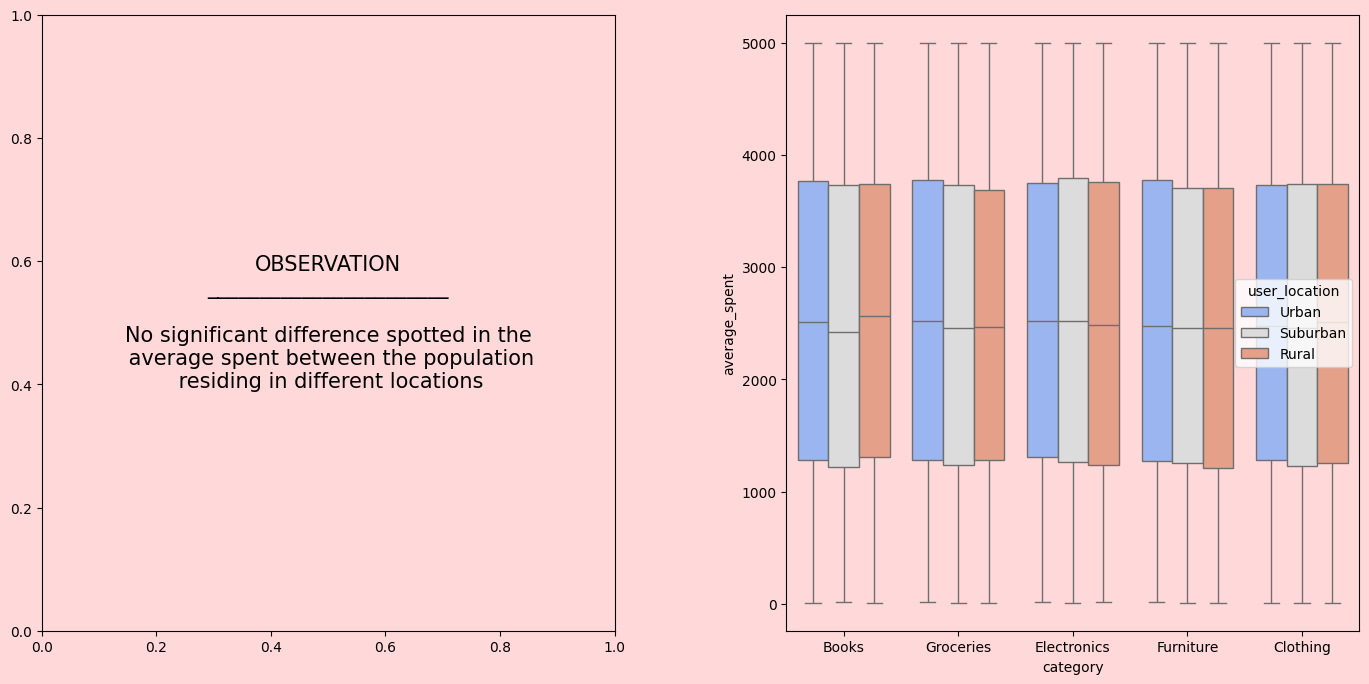

In [60]:
fig = plt.figure(figsize=(17,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3,hspace=0.08)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor('#ffd9d9')
ax=sns.boxplot(x='category', y='average_spent', hue = 'user_location', data=df, palette='coolwarm', ax = sec_2)

sec_1.text(0.5, 0.5, f'OBSERVATION\n_______________________\n\nNo significant difference spotted in the\n average spent between the population\n residing in different locations', va='center',ha='center', size=15)


## Day_of_the week & purchases

Text(0.5, 0.5, 'OBSERVATION\n_______________________\n\nUsers shop more during the weekdays\n as compared to weekends')

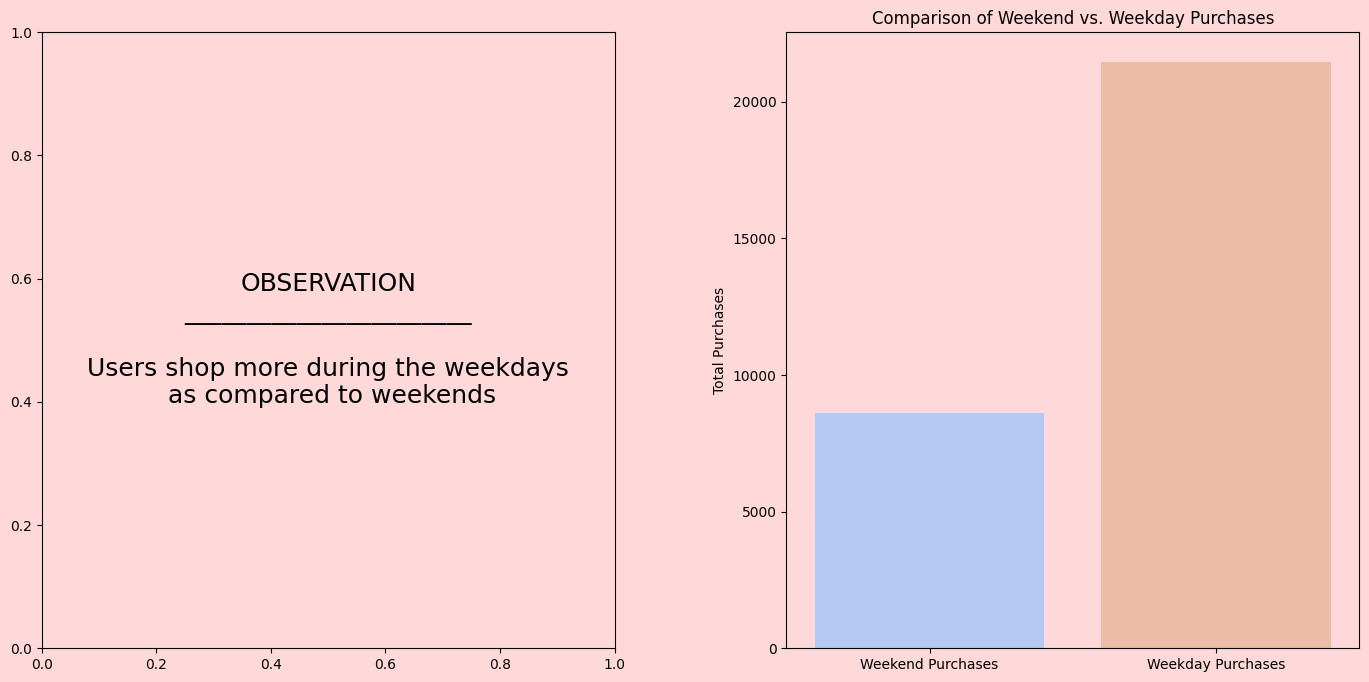

In [61]:
fig = plt.figure(figsize=(17,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3,hspace=0.08)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor('#ffd9d9')

ax=total_purchases = {'Weekend Purchases': x_encoded['weekend_purchases'].sum(),
    'Weekday Purchases': x_encoded['weekday_purchases'].sum()}
sns.barplot(x=list(total_purchases.keys()), y=list(total_purchases.values()), palette="coolwarm")
plt.ylabel("Total Purchases")
plt.title("Comparison of Weekend vs. Weekday Purchases")

sec_1.text(0.5, 0.5, f'OBSERVATION\n_______________________\n\nUsers shop more during the weekdays\n as compared to weekends', va='center', ha='center', size=18)

# Average spent by age_group on different categories

Text(0.5, 0.5, 'OBSERVATION\n_______________________\n\nUsers under 30 spend more on books\n users 50+ spend more on electronics\n though the difference is insignificant')

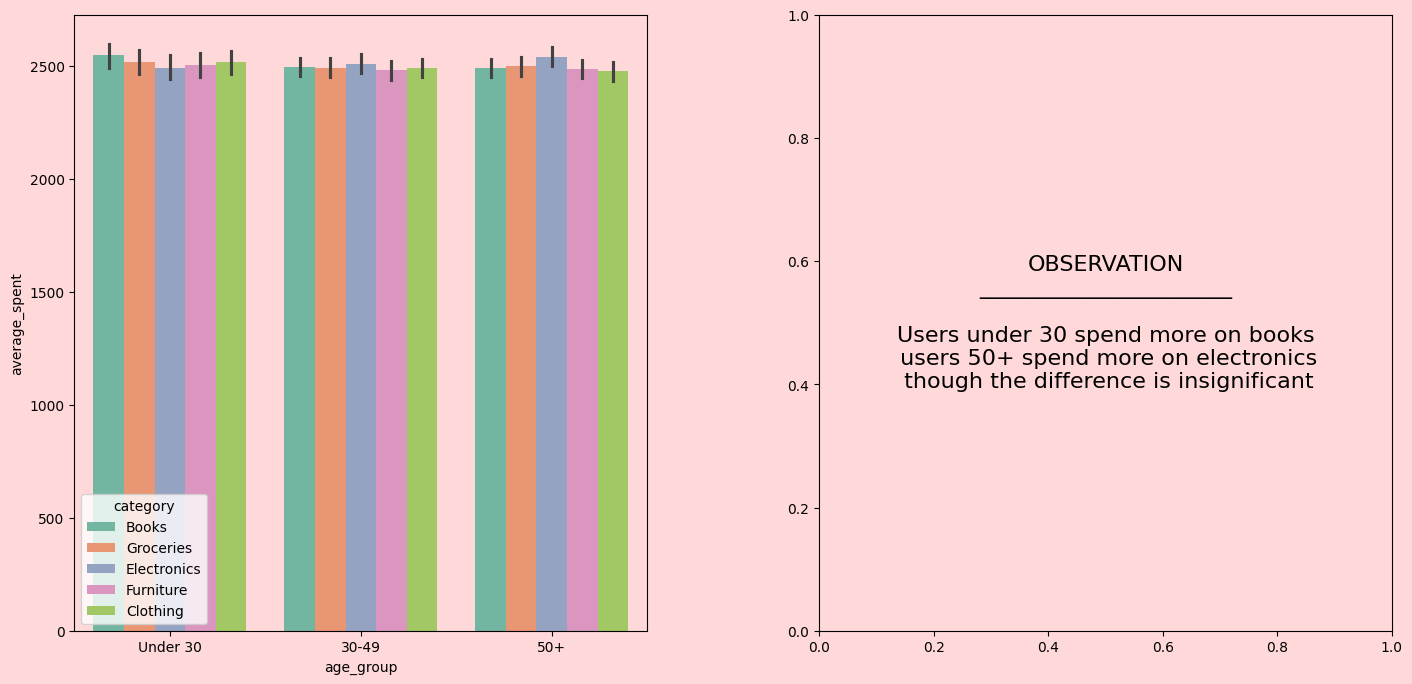

In [62]:
fig = plt.figure(figsize=(17,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3,hspace=0.08)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor('#ffd9d9')

ax=total_purchases = sns.barplot(x='age_group', y = 'average_spent', hue='category', data=df, palette='Set2', ax=sec_1)


sec_2.text(0.5, 0.5, f'OBSERVATION\n_______________________\n\nUsers under 30 spend more on books\n users 50+ spend more on electronics\n though the difference is insignificant', va='center', ha='center', size=16)





## Average spent by age and gender

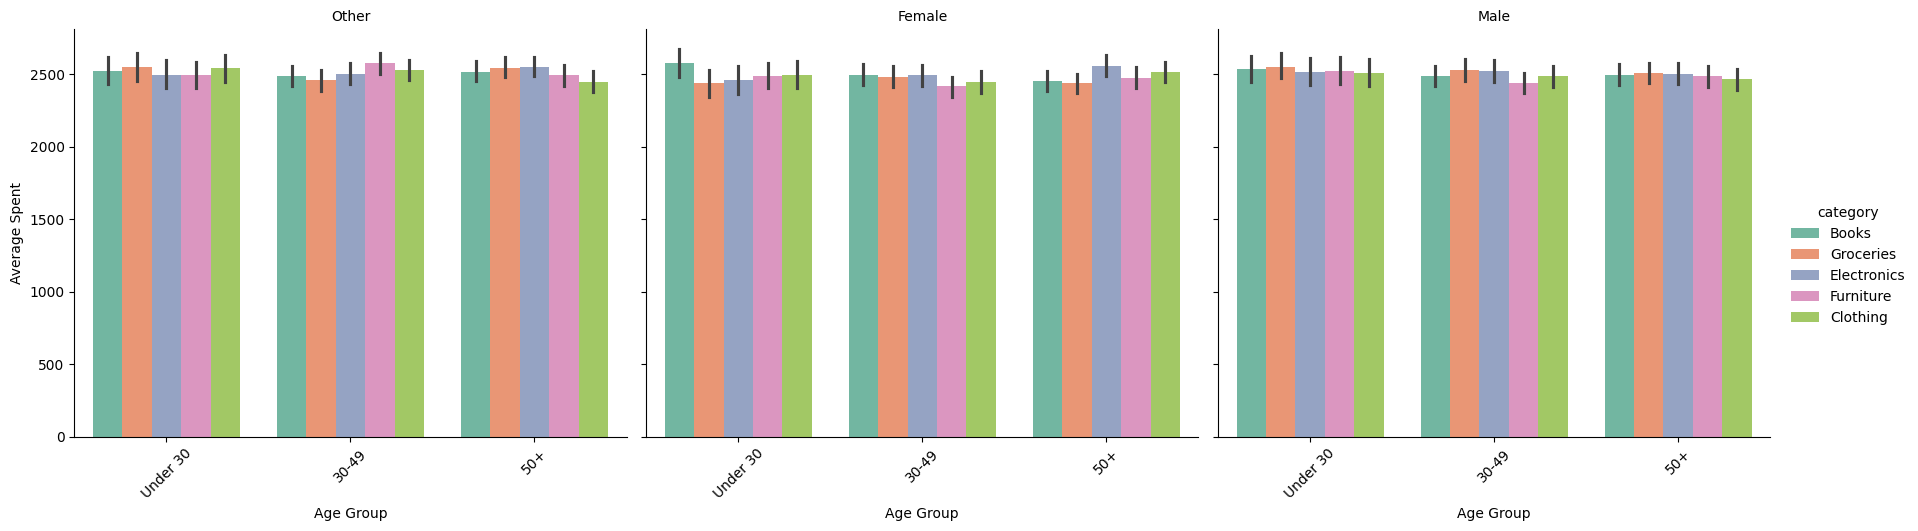

In [63]:
g = sns.catplot(
    x='age_group', y='average_spent', hue='category',
    col='user_gender', data=df, kind='bar', palette='Set2',
    height=5, aspect=1.2
)
g.set_axis_labels("Age Group", "Average Spent")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)

plt.show()


## Average spent by user(gender) in different locations

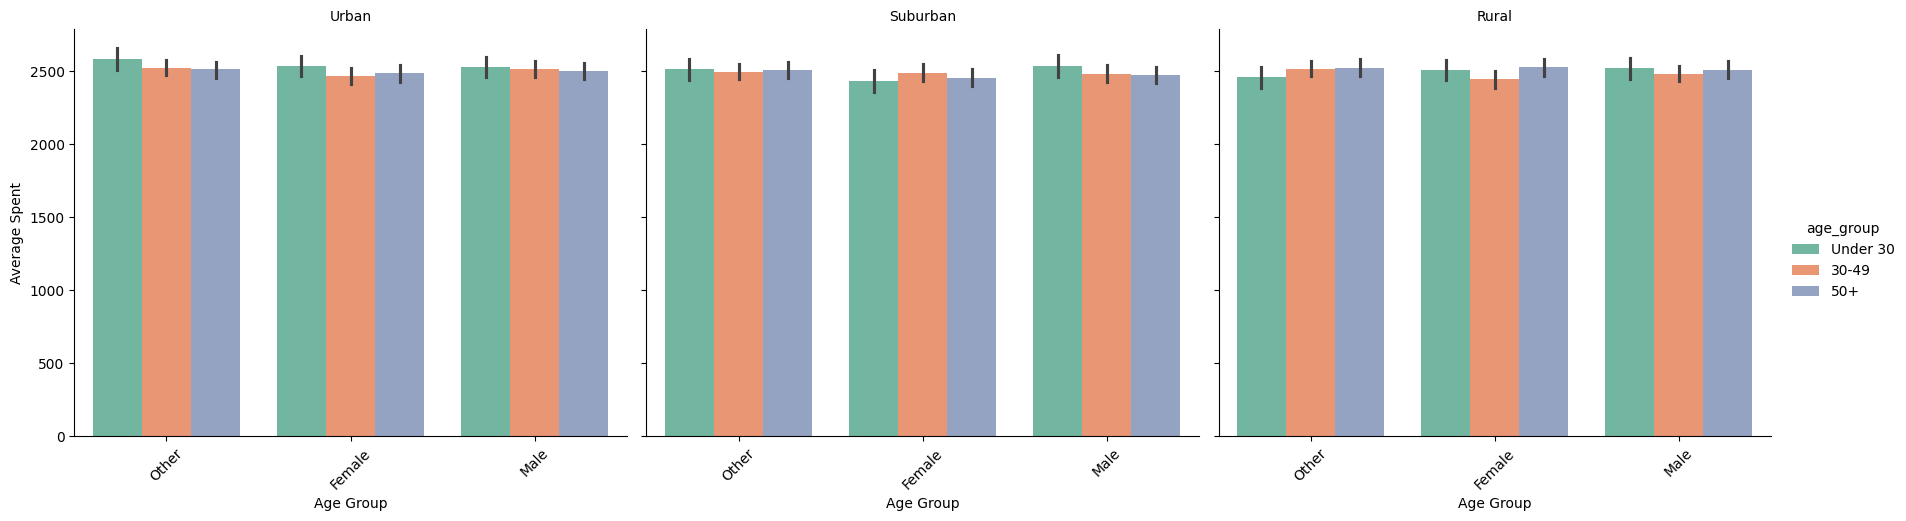

In [64]:
g = sns.catplot(
    x='user_gender', y='average_spent', hue='age_group',
    col='user_location', data=df, kind='bar', palette='Set2',
    height=5, aspect=1.2
)
g.set_axis_labels("Age Group", "Average Spent")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)

plt.show()

# Spliting Data into Train and Test

In [65]:
from sklearn.model_selection import train_test_split
x_scaler_train, x_scaler_test, y_train, y_test = train_test_split(x_scaler,y, test_size = 0.3, random_state = 2529)

# Model selection and Training

In [66]:
# Trying all the models to check the difference in the accuracy

In [90]:
#pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 655.4 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 1.3 MB/s eta 0:01:40
   ---------------------------------------- 0.6/124.9 MB 2.9 MB/s eta 0:00:43
   ---------------------------------------- 1.3/124.9 MB 4.7 MB/s eta 0:00:27
    --------------------------------------- 1.8/124.9 MB 5.8 MB/s eta 0:00:22
    --------------------------------------- 2.4/124.9 MB 6.5 MB/s eta 0:00:19
    --------------------------------------- 3.0/124.9 MB 7.2 MB/s eta 0:00:17
   - -------------------------------------- 3.5/124.9 MB 7.8 MB/s eta 0:00:16
   - -------------------------------------- 4.1/124.9 MB 8.2 MB/s eta 0:00:15
   

In [107]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=5)

# from sklearn.svm import SVC
# model = SVC(kernel='rbf')

# from xgboost import XGBClassifier
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


                

In [108]:
model= model.fit(x_scaler_train, y_train)

In [109]:
y_pred_train = model.predict(x_scaler_train)
y_pred_test = model.predict(x_scaler_test)

# Evaluating the Model

In [110]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [111]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

1.0

0.49833333333333335


In [112]:
y.value_counts(normalize= True)*100

1    50.146667
0    49.853333
Name: proportion, dtype: float64

In [113]:
print(confusion_matrix(y_test, y_pred_test))

[[4687 4312]
 [4718 4283]]


In [114]:
#confusion matrix shows why model has 50% accuracy;

In [115]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      8999
           1       0.50      0.48      0.49      9001

    accuracy                           0.50     18000
   macro avg       0.50      0.50      0.50     18000
weighted avg       0.50      0.50      0.50     18000



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_scaler_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_scaler_test)